# Logistic Regression with non-linear features

## import library

In [790]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import ticker, cm

## load training data

In [791]:
fname_data1 = 'assignment_09_data1.txt'
fname_data2 = 'assignment_09_data2.txt'

data1        = np.genfromtxt(fname_data1, delimiter=',')
data2        = np.genfromtxt(fname_data2, delimiter=',')

number_data1 = data1.shape[0]
number_data2 = data2.shape[0]

data1_point     = data1[:, 0:2]
data1_point_x   = data1_point[:, 0]
data1_point_y   = data1_point[:, 1]
data1_label     = data1[:, 2]

data2_point     = data2[:, 0:2]
data2_point_x   = data2_point[:, 0]
data2_point_y   = data2_point[:, 1]
data2_label     = data2[:, 2]

data1_label_class_0     = (data1_label == 0)
data1_label_class_1     = (data1_label == 1)

data2_label_class_0     = (data2_label == 0)
data2_label_class_1     = (data2_label == 1)

data1_point_x_class_0   = data1_point_x[data1_label_class_0]
data1_point_y_class_0   = data1_point_y[data1_label_class_0]

data1_point_x_class_1   = data1_point_x[data1_label_class_1]
data1_point_y_class_1   = data1_point_y[data1_label_class_1]

data2_point_x_class_0   = data2_point_x[data2_label_class_0]
data2_point_y_class_0   = data2_point_y[data2_label_class_0]

data2_point_x_class_1   = data2_point_x[data2_label_class_1]
data2_point_y_class_1   = data2_point_y[data2_label_class_1]

print('shape of point in data1 = ', data1_point.shape)
print('shape of point in data2 = ', data2_point.shape)

print('shape of label in data1 = ', data1_label.shape)
print('shape of label in data2 = ', data2_label.shape)

print('data type of point x in data1 = ', data1_point_x.dtype)
print('data type of point y in data1 = ', data1_point_y.dtype)

print('data type of point x in data2 = ', data2_point_x.dtype)
print('data type of point y in data2 = ', data2_point_y.dtype)


shape of point in data1 =  (1000, 2)
shape of point in data2 =  (1000, 2)
shape of label in data1 =  (1000,)
shape of label in data2 =  (1000,)
data type of point x in data1 =  float64
data type of point y in data1 =  float64
data type of point x in data2 =  float64
data type of point y in data2 =  float64


## plot the data

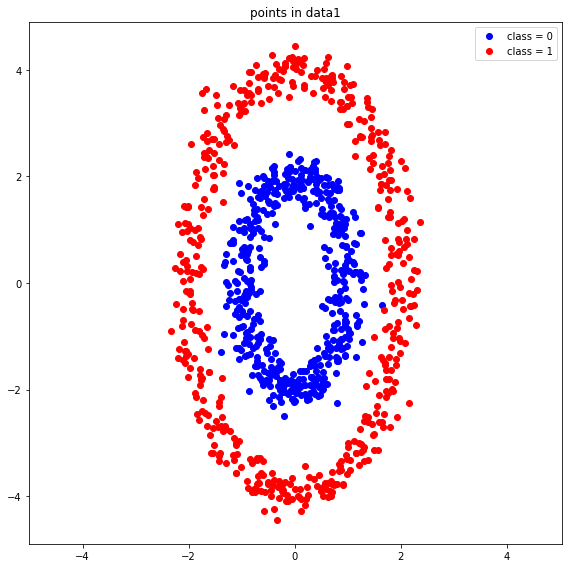

In [792]:
f = plt.figure(figsize=(8,8))   

plt.title('points in data1')
plt.plot(data1_point_x_class_0, data1_point_y_class_0, 'o', color='blue', label='class = 0')
plt.plot(data1_point_x_class_1, data1_point_y_class_1, 'o', color='red', label='class = 1')
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

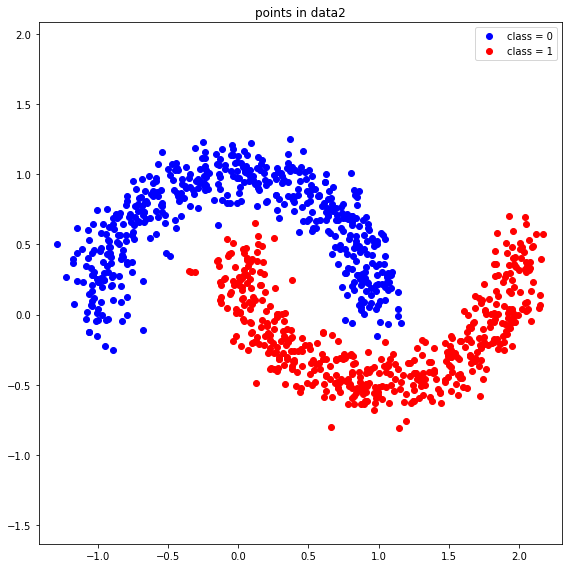

In [793]:
f = plt.figure(figsize=(8,8))   

plt.title('points in data2')
plt.plot(data2_point_x_class_0, data2_point_y_class_0, 'o', color='blue', label='class = 0')
plt.plot(data2_point_x_class_1, data2_point_y_class_1, 'o', color='red', label='class = 1')
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

## define the feature functions

- feature vector is defined by $(1, f_1(x, y), f_2(x, y), \cdots, f_{k-1}(x, y)) \in \mathbb{R}^k$

In [794]:
data1_point

array([[ 0.83159, -0.33906],
       [ 0.87196,  0.24418],
       [ 1.01934,  0.23241],
       ...,
       [ 2.01992, -0.31388],
       [ 2.30028,  0.22118],
       [ 1.82426, -0.14913]])

In [795]:
def compute_feature1(point):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #데이터1포인트가 인풋으로 들어왔을 때 그것의 피쳐함수를 정의하기. 모든 포인트에대한 피쳐벡터 정의 하기 
    #아 이 피쳐를 쌩으로 하는게 아니라 노말라이즈 같은걸 시켜주기 위해 하는구나~?
    point_x   = point[:, 1]
    point_y   = point[:, 2]
    degree = 6
    out = np.ones(point.shape[0])[:,np.newaxis]
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.hstack((out, np.multiply(np.power(point_x, i-j),np.power(point_y, j))[:,np.newaxis]))
    feature=out
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return feature

In [796]:
# point_x   = data1_point[:, 0]
# point_y   = data1_point[:, 1]
# degree = 6
# out = np.ones(data1_point.shape[0])[:,np.newaxis]
# for i in range(1, degree+1):
#     for j in range(i+1):
#         out = np.hstack((out, np.multiply(np.power(point_x, i-j),np.power(point_y, j))[:,np.newaxis]))
# print(out.shape)

In [797]:
def compute_feature2(point):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    point_x   = point[:, 1]
    point_y   = point[:, 2]
    degree = 6
    out = np.ones(point.shape[0])[:,np.newaxis]
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.hstack((out, np.multiply(np.power(point_x, i-j),np.power(point_y, j))[:,np.newaxis]))
    feature=out
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return feature

## define the linear regression function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature = $(1, f_1(x, y), \cdots, f_{k-1}(x, y)) \in \mathbb{R}^k$

In [798]:
def compute_linear_regression(theta, feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    value = np.inner(theta,feature)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value

## define sigmoid function with input

- $z \in \mathbb{R}$

In [799]:
def sigmoid(z):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    value = 1/(1 + np.exp(-z))

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value 

## define the logistic regression function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$

In [800]:
def compute_logistic_regression(theta, feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    y=compute_linear_regression(theta, feature)
    value = sigmoid(y)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value

## define the residual function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [801]:
def compute_residual(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    y=compute_logistic_regression(theta, feature)
    residual=-label*np.log(y) - (1 - label)*np.log(1 - y)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return residual

## define the loss function for the logistic regression

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [802]:
def compute_loss(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    loss = (1/number_data1)*np.sum(compute_residual(theta, feature, label))

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return loss

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

## define the gradient of the loss with respect to the model parameter $\theta$

In [803]:
def compute_gradient(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    gradient1=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,0])/number_data1
    gradient2=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,1])/number_data1
    gradient3=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,2])/number_data1
    gradient4=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,3])/number_data1
    gradient5=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,4])/number_data1
    gradient6=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,5])/number_data1
    gradient7=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,6])/number_data1
    gradient8=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,7])/number_data1
    gradient9=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,8])/number_data1
    gradient10=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,9])/number_data1
    gradient11=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,10])/number_data1
    gradient12=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,11])/number_data1
    gradient13=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,12])/number_data1
    gradient14=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,13])/number_data1
    gradient15=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,14])/number_data1
    gradient16=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,15])/number_data1
    gradient17=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,16])/number_data1
    gradient18=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,17])/number_data1
    gradient19=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,18])/number_data1
    gradient20=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,19])/number_data1
    gradient21=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,20])/number_data1
    gradient22=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,21])/number_data1
    gradient23=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,22])/number_data1
    gradient24=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,23])/number_data1
    gradient25=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,24])/number_data1
    gradient26=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,25])/number_data1
    gradient27=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,26])/number_data1
    gradient28=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,27])/number_data1
    

    
    gradient=np.array([gradient1,gradient2,gradient3,gradient4,gradient5,gradient6,gradient7,gradient8,gradient9,
    gradient10,gradient11,gradient12,gradient13,gradient14,gradient15,gradient16,gradient17,gradient18,
    gradient19,gradient20,gradient21,gradient22,gradient23,gradient24,gradient25,gradient26,gradient27,gradient28])
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return gradient

## compute the accuracy of the prediction for point with a given model parameter

In [804]:
# def compute_accuracy(theta, feature, label):

#     # ++++++++++++++++++++++++++++++++++++++++++++++++++
#     # complete the blanks
#     # 정확하게 클래시파이어가 구분한 수 / 전체 포인트 수 
    
#     a=compute_logistic_regression(theta, feature)
#     c=np.where(a>0.5,1,0)
#     d=[]
#     for i,j in zip(label,c):
#         if i==j:
#             d.append(1)
#     accuracy=len(d)/len(label)             
#     #
#     # ++++++++++++++++++++++++++++++++++++++++++++++++++

#     return accuracy

In [805]:
def compute_accuracy(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    # 정확하게 클래시파이어가 구분한 수 / 전체 포인트 수 
    
    prob=compute_logistic_regression(theta, feature)
    predicted_labels=np.where(prob>0.5,1,0)
    diff = predicted_labels - label
    accuracy=1.0 - (float(np.count_nonzero(diff)) / len(diff))         
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return accuracy

## initialize the gradient descent algorithm

In [806]:
data1_number_iteration   = 1000
data2_number_iteration   = 1000

data1_learning_rate   = 0.01 
data2_learning_rate   = 0.01 

data1_number_feature    = 28##아 여기서 사용할 포인터의 피쳐벡터를 설정하는구나 마치 트레인셋같은개념인가?
data2_number_feature    = 28 

theta1  = np.zeros(data1_number_feature)#그래서 이 수만큼 세타의 수도 같이 조정이된다. 
theta2  = np.zeros(data2_number_feature)

data1_loss_iteration  = np.zeros(data1_number_iteration)
data2_loss_iteration  = np.zeros(data2_number_iteration)

data1_accuracy_iteration    = np.zeros(data1_number_iteration)
data2_accuracy_iteration    = np.zeros(data2_number_iteration)

## run the gradient descent algorithm to optimize the loss function with respect to the model parameter

In [807]:
point_class_0   = np.ones((1000, 3))

In [808]:
point_class_0[:, 1] = data1_point[:,0]
point_class_0[:, 2] = data1_point[:,1]
data1_point2=point_class_0

In [809]:
from tqdm import tqdm

In [810]:
for i in tqdm(range(data1_number_iteration)):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    #지금 그라디언트디센트구하는과정에서 넘파이 결합할때 3개밖에안된다. 그걸 해소해야한다.
    theta1      = theta1-(data1_learning_rate*compute_gradient(theta1, compute_feature1(data1_point2), data1_label))
    loss1       = compute_loss(theta1, compute_feature1(data1_point2), data1_label)
    accuracy1   = compute_accuracy(theta1, compute_feature1(data1_point2), data1_label)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    data1_loss_iteration[i]     = loss1
    data1_accuracy_iteration[i] = accuracy1

data1_theta_optimal = theta1

  0%|          | 0/1000 [00:00<?, ?it/s]/tmp/ipykernel_1377601/2010757943.py:7: RuntimeWarning: divide by zero encountered in log
  residual=-label*np.log(y) - (1 - label)*np.log(1 - y)
/tmp/ipykernel_1377601/2010757943.py:7: RuntimeWarning: invalid value encountered in multiply
  residual=-label*np.log(y) - (1 - label)*np.log(1 - y)
100%|██████████| 1000/1000 [00:05<00:00, 167.72it/s]


In [811]:
theta1.shape

(28,)

In [812]:
(data1_learning_rate*compute_gradient(theta1, compute_feature1(data1_point2), data1_label)).shape

(28,)

In [813]:
point_class_1   = np.ones((1000, 3))
point_class_1[:, 1] = data2_point[:,0]
point_class_1[:, 2] = data2_point[:,1]
data2_point2=point_class_0

In [814]:
for i in range(data2_number_iteration):
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    theta2      = theta2-(data2_learning_rate*compute_gradient(theta2, compute_feature2(data2_point2), data2_label))
    loss2       = compute_loss(theta2, compute_feature2(data2_point2), data2_label)
    accuracy2   = compute_accuracy(theta2, compute_feature2(data2_point2), data2_label)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    data2_loss_iteration[i]     = loss2
    data2_accuracy_iteration[i] = accuracy2

data2_theta_optimal = theta2

/tmp/ipykernel_1377601/2010757943.py:7: RuntimeWarning: divide by zero encountered in log
  residual=-label*np.log(y) - (1 - label)*np.log(1 - y)
/tmp/ipykernel_1377601/2010757943.py:7: RuntimeWarning: invalid value encountered in multiply
  residual=-label*np.log(y) - (1 - label)*np.log(1 - y)


___

___

## functions for presenting the results

___

___

In [815]:
def function_result_01():

    print("final loss for data1 = {:13.10f}".format(data1_loss_iteration[-1]))

In [816]:
def function_result_02():

    print("final loss for data2 = {:13.10f}".format(data2_loss_iteration[-1]))

In [817]:
def function_result_03():

    print("final accuracy for data1 = {:13.10f}".format(data1_accuracy_iteration[-1]))

In [818]:
def function_result_04():

    print("final accuracy for data2 = {:13.10f}".format(data2_accuracy_iteration[-1]))

In [819]:
def function_result_05():
    
    plt.figure(figsize=(8,6))
    plt.title('loss for data1')

    plt.plot(data1_loss_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [820]:
def function_result_06():

    plt.figure(figsize=(8,6))
    plt.title('loss for data2')

    plt.plot(data2_loss_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [821]:
def function_result_07():
    
    plt.figure(figsize=(8,6))
    plt.title('accuracy for data1')

    plt.plot(data1_accuracy_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('accuracy')

    plt.tight_layout()
    plt.show()

In [822]:
def function_result_08():
    
    plt.figure(figsize=(8,6))
    plt.title('accuracy for data2')

    plt.plot(data2_accuracy_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('accuracy')

    plt.tight_layout()
    plt.show()

## plot the linear regression values over the 2-dimensional Euclidean space and superimpose the training data

In [823]:
def function_result_09():

    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('linear regression values')
    
    min_x   = np.min(data1_point_x)
    max_x   = np.max(data1_point_x)
    min_y   = np.min(data1_point_y)
    max_y   = np.max(data1_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [824]:
def function_result_10():
    
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('linear regression values')
    
    min_x   = np.min(data2_point_x)
    max_x   = np.max(data2_point_x)
    min_y   = np.min(data2_point_y)
    max_y   = np.max(data2_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

## plot the logistic regression values over the 2-dimensional Euclidean space

In [825]:
def function_result_11():

    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('logistic regression values')
    
    min_x   = np.min(data1_point_x)
    max_x   = np.max(data1_point_x)
    min_y   = np.min(data1_point_y)
    max_y   = np.max(data1_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [826]:
def function_result_12():
    
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('logistic regression values')

    min_x   = np.min(data2_point_x)
    max_x   = np.max(data2_point_x)
    min_y   = np.min(data2_point_y)
    max_y   = np.max(data2_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

___

___

## results

___

___

**************************************************
## [RESULT 01]
**************************************************
final loss for data1 =           nan
**************************************************
## [RESULT 02]
**************************************************
final loss for data2 =           nan
**************************************************
## [RESULT 03]
**************************************************
final accuracy for data1 =  0.9980000000
**************************************************
## [RESULT 04]
**************************************************
final accuracy for data2 =  0.9980000000
**************************************************
## [RESULT 05]
**************************************************


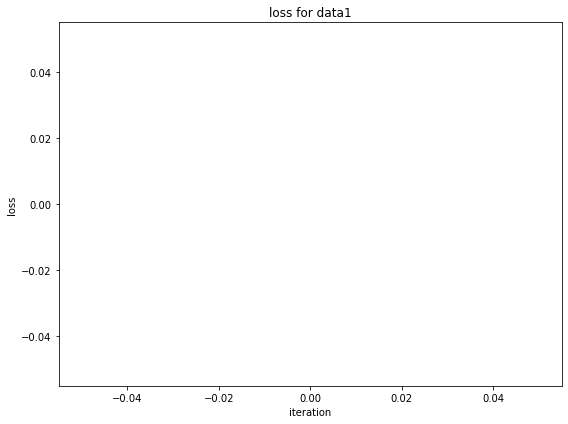

**************************************************
## [RESULT 06]
**************************************************


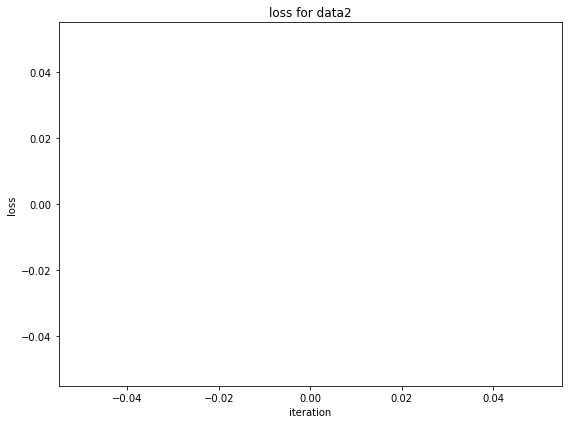

**************************************************
## [RESULT 07]
**************************************************


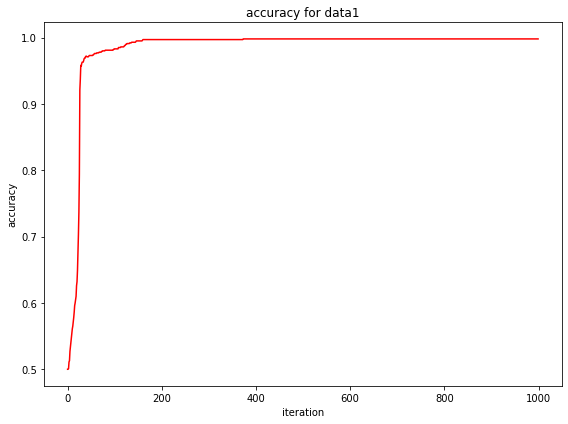

**************************************************
## [RESULT 08]
**************************************************


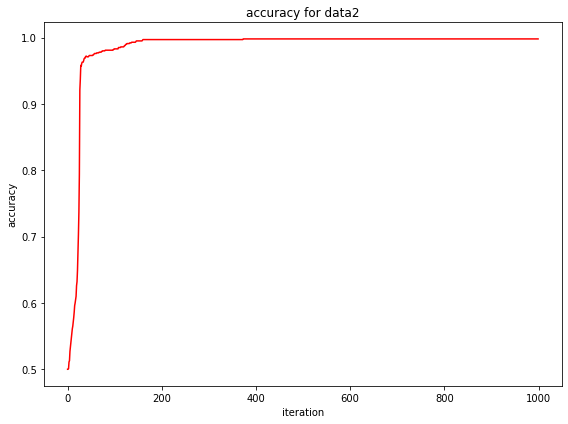

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


**************************************************
## [RESULT 09]
**************************************************


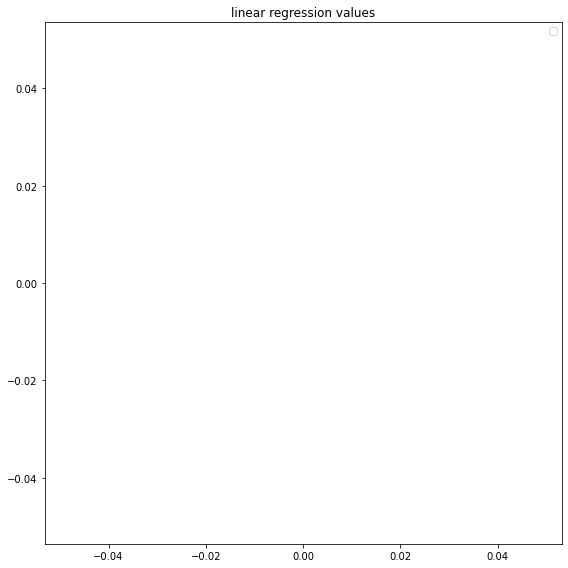

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


**************************************************
## [RESULT 10]
**************************************************


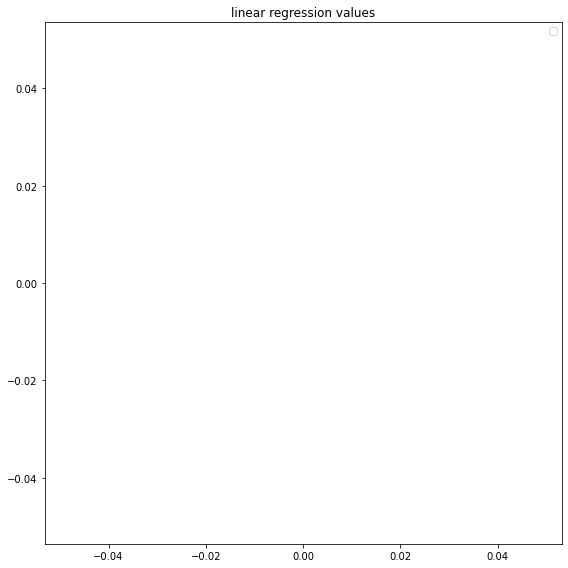

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


**************************************************
## [RESULT 11]
**************************************************


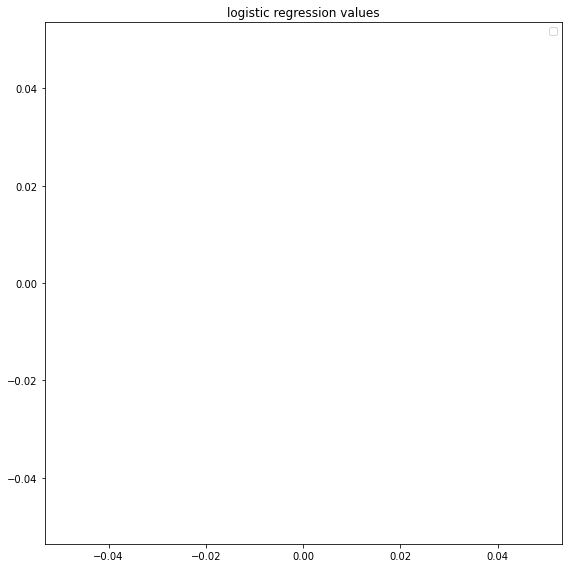

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


**************************************************
## [RESULT 12]
**************************************************


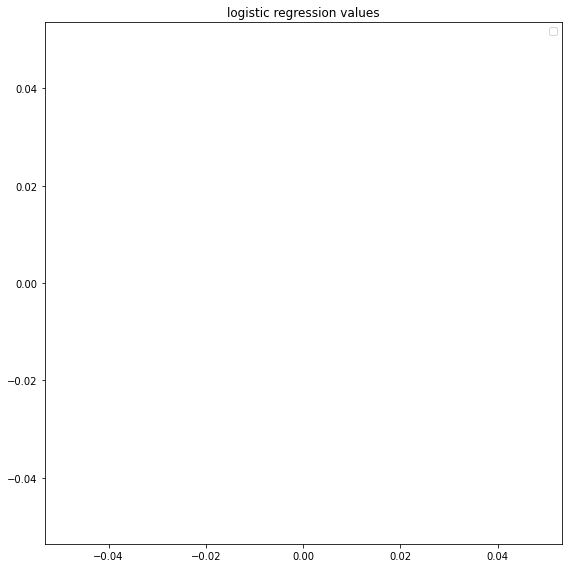

In [827]:
number_result = 12

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)